## **VISÃO COMPUTACIONAL - AULA 08**

**Objetivos da aula:**

*   conhecer o processo de transformação de uma imagem do domínio espacial para o domínio da frequencia, via Transformada de Fourier
*   implementar a Transformada de Fourier Unidimensional
*   implementar a Transformada de Fourier Rápida
*   implementar a Transformada de Fourier Bidimensional










**DOMÍNIO DA FREQUENCIA**

Diversos problemas em Visão Computacional e Processametno Digital de Imagens podem ser melhor abordados quanto transformamos uma imagem do **domínio espacial** para o **domínio da frequencia**. Por exemplo, bluring de imagens pode ser visto como um filtro passa-baixas (só deixamos passar as frequencia baixas da imagem transformada).


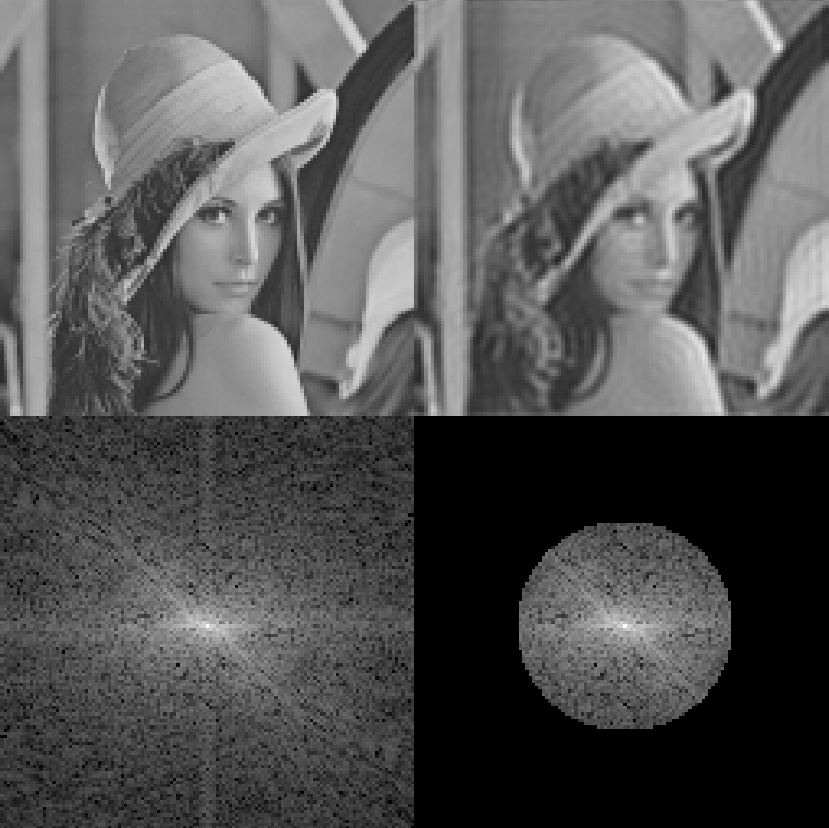

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('fourier.png')
cv2_imshow(img)


In [3]:
#blur: mascara do tipo filtro passa baixo
#filtro sharpen: tudo em volta branco (deixar a imagem mais realcada)
# banda: filtros para detectar contorno
    # borda: filtra alto frequência e baixa frequência


# serie de operacoes de tratamento são feitas agora de forma homogenia:
#transforma para frequencia e depois muda o filtro

Existem diversos procedimentos para transformar uma imagem do domínio especial para o domínio da frequencia:

*   Transformada de Fourier
*   Transformada de Fourier com janela
*   Transformada de Wavelet




**TRANSFORMADA DE FOURIER UNIDIMENSIONAL**

A Transformada de Fourier é uma transformada integral que expressa uma função em termos de funções de base sinusoidal. A transformada de Fourier de uma função temporal é uma função de valor complexo da frequência, cujo valor absoluto representa a soma das frequências presente na função original e cujo argumento complexo é a fase de deslocamento da base sinusoidal naquela frequência.

Abaixo, temos a expressão desta transformada (e sua inversa) para um sinal unidimensional:



*   List item
*   List item



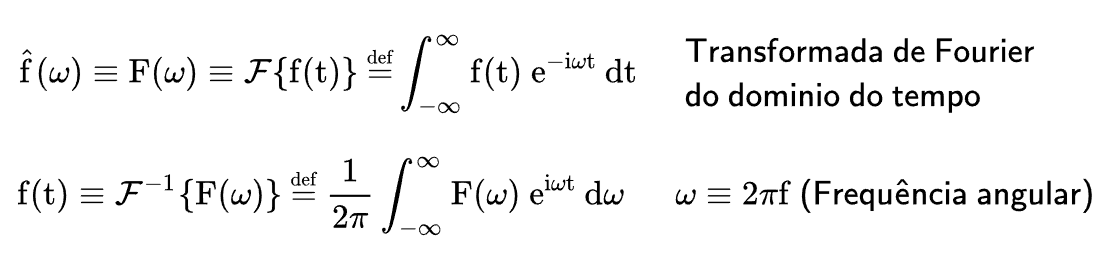

In [ ]:
img = cv.imread('fourieruni.png')
cv2_imshow(img)

A fórmula acima é chamada **Transformada de Fourier Contínua**. Quando trabalhamos com sinais digitais, a integral é transformada numa somatória, conforme mostrado abaixo. Esta transformada é chamada DFT (Discrete Fourier Transform).

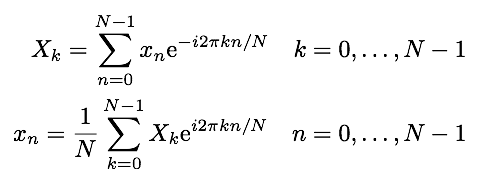

In [ ]:
img = cv.imread('fourierdiscrete.png')
cv2_imshow(img)

**EXERCÍCIO**

Implemente as funções **dft(x)** e **idft(t)** mostradas abaixo, que calculem a transformada discreta e discreta inversa de fourier de um vetor numérico x e t,respectivamente. Sugestão: use o módulo **cmath** do Python que permite a manipulação de números complexos.

In [ ]:
import cmath

def dft(x):
  #implemente seu código aqui e retorne a transformada em t
  return t

def idft(t):
  #implemente seu código aqui e retorne a inversa da transformada em x
  return x


O módulo numpy já possui uma implementação bastante eficiente da Transformada de Fourier, chamada **FFT (Fast Fourier Transform)**. Esta implementação usa uma estratégia do tipo butterfly pasra acelerar os cálculos dos coeficientes da transformada (e sua inversa).

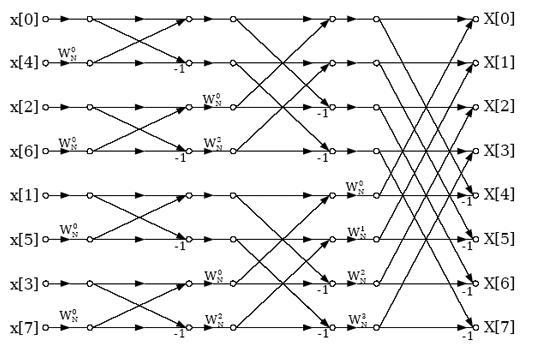

In [ ]:
img = cv.imread('fft.png')
cv2_imshow(img)

Uma implementação recursiva da fft está mostrada abaixo:

In [ ]:
from cmath import exp, pi

def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]
           
print(fft([1,1,1,1,0,0,0,0]))

Para calcular a Transformada Rápida de Fourier em Python, utilizamos o método fft do submódulo fft do numpy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t=np.arange(256)
x=np.sin(t)
plt.plot(t,x)
plt.show()
ft=np.fft.fft(x)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq,ft.real)
plt.show()
plt.plot(freq,ft.imag)
plt.show()

Para calcular a inversa, utilizamos o método ifft.

In [ ]:
t=np.arange(256)
x=np.fft.ifft(ft)
plt.plot(t,x)
plt.show()

**TRANSFORMADA DE FOURIER BIDIMENSIONAL**

Imagens também podem ser vistas como sinais, porém especificadas como uma **função bidimensional** f(x,y). Neste caso, a Transformada de Fourier toma uma forma mais complexa, com o uso de duas integrais.

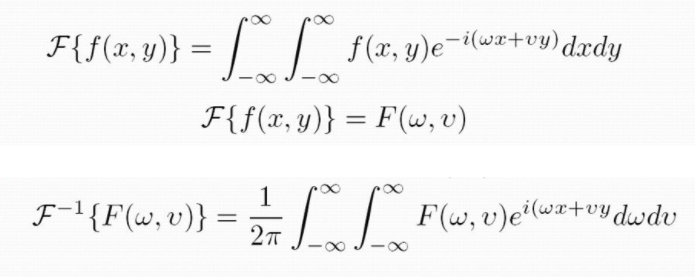

In [ ]:
img = cv.imread('fourierbi.png')
cv2_imshow(img)

**EXERCÍCIO**

Implemente as funções **dft(img)** e **idft(imgt)** mostradas abaixo, que calculem a transformada discreta e discreta inversa de fourier de uma imagem img e imgt,respectivamente. Sugestão: use  novamente o módulo **cmath** do Python que permite a manipulação de números complexos.

In [ ]:
import cmath

def dft(img):
  #implemente seu código aqui e retorne a transformada em imgt
  return imgt

def idft(imgt):
  #implemente seu código aqui e retorne a inversa da transformada em img
  return img

Podemos calcular esta transformada também usando o submódulo fft do numpy, porém agora usando o método fft2.

(512, 512)


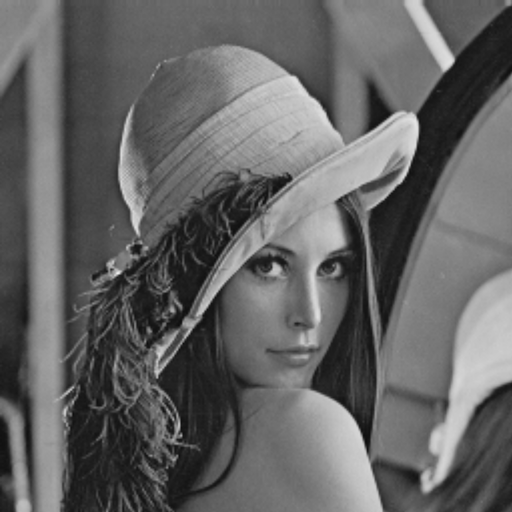

In [ ]:
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
print(img.shape)
cv2_imshow(img)

In [ ]:
imgf=np.fft.fft2(img)
cv2_imshow(imgf.real)

In [ ]:
cv2_imshow(imgf.imag)

Para inverter o resultado da transformada bidimensional, usamos o código abaixo:

In [ ]:
img=np.fft.ifft2(imgf)
cv2_imshow(img)